The sole aim of a business is profit making.For an organisation to gain competitive advantage, it has to understand the market and its customers. Understand the preferences of the market and align its business processes with this. Using the dataset described earlier, the following questions will be answered;
1)What particular pizza product do customers buy less,
2)What pizza category, and pizza name do customers buy less  
3)What pizza category, and pizza size do customers buy less
 
Pizza products be discontinued based on sales performance?


Mounting Google Colab on Google Drive

In [3]:
#Connecting Google Drive with Colab and Mounting it on the Drive
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab


Importing Libraries needed for this Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import preprocessing
from scipy import stats
%matplotlib inline 

Checking our folder to know the exact name of our Csv file which is the Data Model-Pizza Sales.csv

In [5]:
ls

 AB_NYC_2019.csv                         drug200.csv
'antiretroviral awareness Cleaned.csv'   FuelConsumption.csv
'antiretroviral awareness.csv'           hcvdat0.csv
'antiretroviral awareness_new.csv'       HIV.csv
 antiretroviral.csv                      HIV.gsheet
 antiretroviral_new.csv                  ibm.csv
 Cipla.csv                               titanic.csv
'Cyclistic data'/                        total_cases.csv
'Data Model - Pizza Sales (1).gsheet'    train.csv
'Data Model - Pizza Sales (2).gsheet'   'Wetland Data.csv'
'Data Model - Pizza Sales.csv'           World_GDP.csv
'Data Model - Pizza Sales.gsheet'


In [6]:
#Loadind Dataset and Viewing the dataset
df=pd.read_csv('Data Model - Pizza Sales.csv')
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,12/31/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,12/31/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,12/31/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,12/31/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
#Viewing the first five rows of the dataset
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [6]:
#Checking for the size of the the dataset
df.shape

(48620, 12)

We can deduce that this dataset has 12 columns and 48620 rows

In [7]:
#Checking for the columns names present in the dataset
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

Printing out information about the Dataframe.Informations such Columns,Columns Label,Columns Datatype,Memory usage,Range Index,Number of cells in each columns

In [8]:
#Printing out information about the Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


Checking for Missing Values in the dataset

In [9]:
#Checking if there is any Null Value Present in the dataset
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

Checking for Null values present using the heatmap function

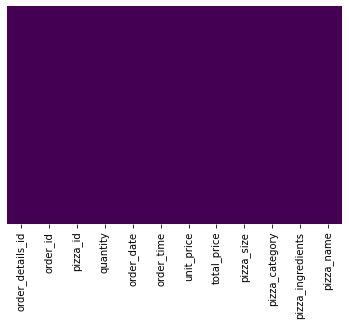

In [10]:
#Every yellow line indicates true(Meanining where we have null values)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the above Visualization we can deduce that no yellow lines are present which means no null values are present in the dataset

What Pizza Names is less ordered for

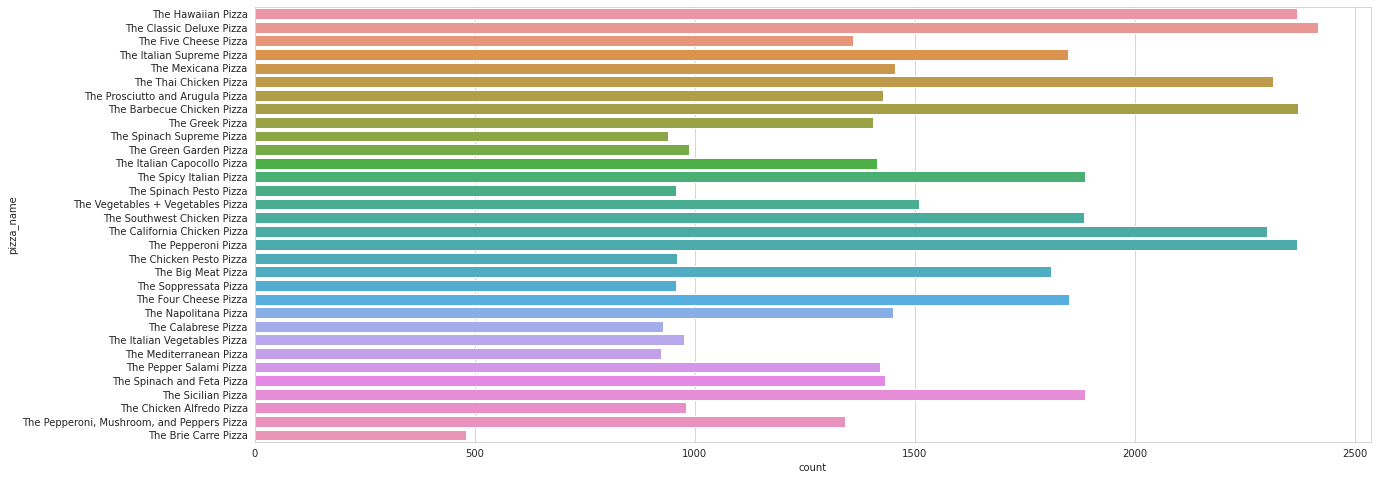

In [11]:
#Using the Seaborn count library to check the less ordering number of Pizzas
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.countplot(y='pizza_name',data=df)

From the above Visualization we can see the less ordered pizza whuch is the Brie Carre Pizza

What Pizzas are Ordered less Monthly

In [12]:
#Using the DatetimeIndex function to create new column names Month,year and day from the Order date Column
df['month']=pd.DatetimeIndex(df['order_date']).month
df['year']=pd.DatetimeIndex(df['order_date']).year
df['day']=pd.DatetimeIndex(df['order_date']).day
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,year,day
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,2015,1
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,2015,1
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,2015,1
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,2015,1
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,2015,1


Plotting Monthly Ordered pizzas

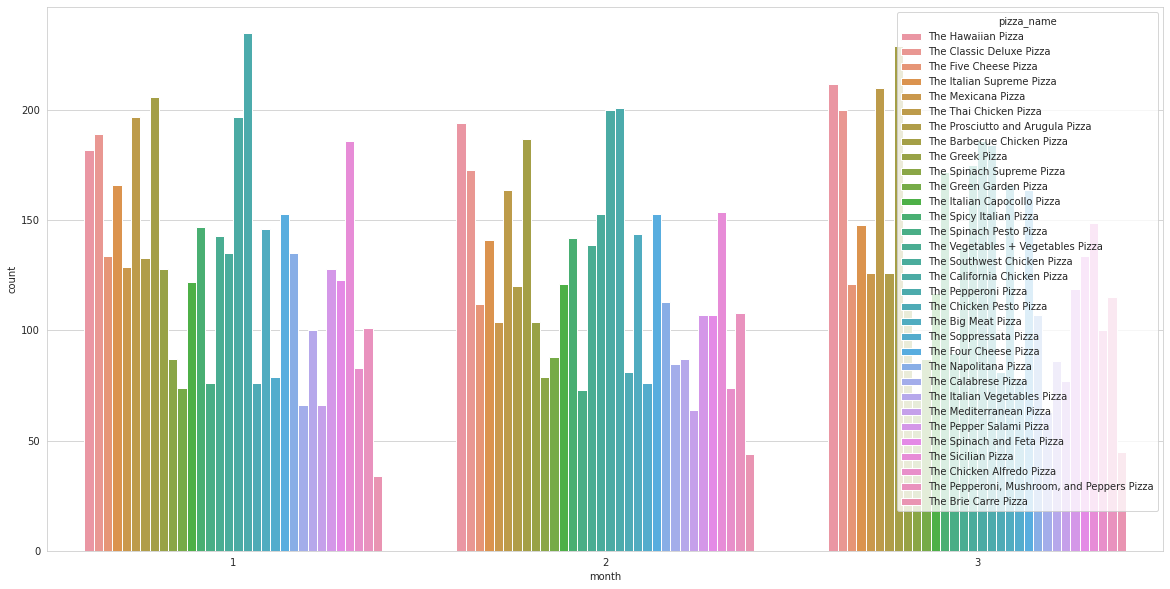

In [13]:
#Ploting Monthly Ordered Pizzas in Phases of three months where 1=January,2=Febuary,3=March
df['month']
df_month=df[df['month'].isin([1,2,3])]
plt.figure(figsize=(20,10))
sns.countplot(x='month',hue='pizza_name',data=df_month)
plt.show()

From the Above plot we can deduce the following

1.   Month 1 which denotes January,The least Ordered Pizza is the Brie Carre Pizza
2.   Month 2 which denotes Febuary,The least Ordered Pizza is the Brie Carre Pizza
3.   Month 3 which denotes March ,The  least Ordered Pizza is the Brie Carre Pizza






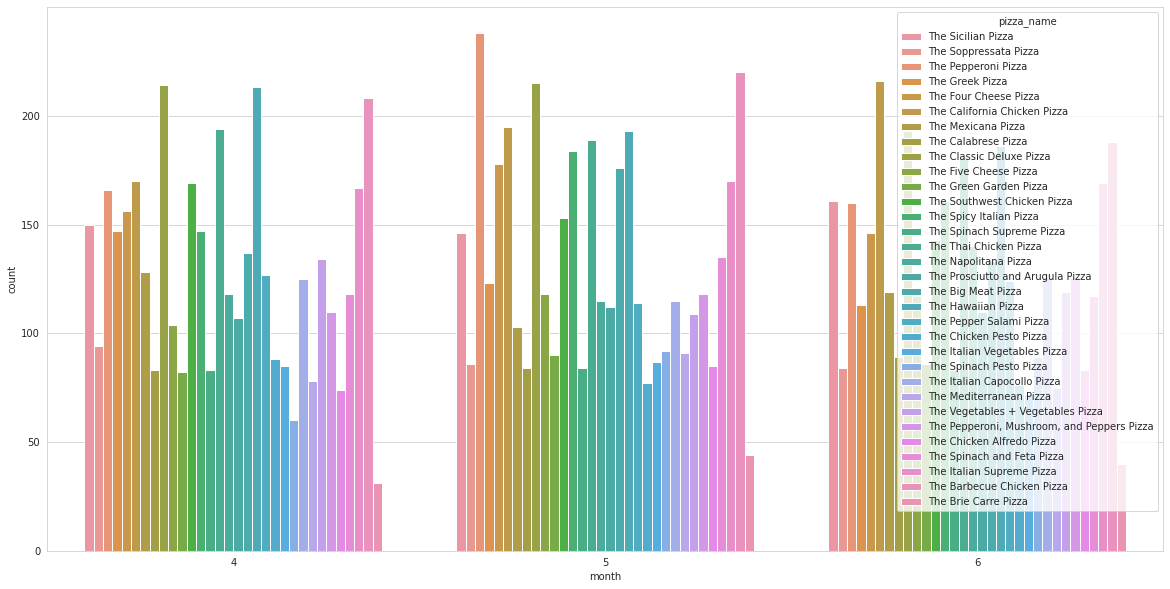

In [14]:
#Ploting Monthly Ordered Pizzas in Phases of three months where 4=April,5=May,6=June
df_month_2=df[df['month'].isin([4,5,6])]
plt.figure(figsize=(20,10))
sns.countplot(x='month',hue='pizza_name',data=df_month_2)
plt.show()

From the Above plot we can deduce the following

1.   Month 4 which denotes April,The least Ordered Pizza is the Brie Carre Pizza
2.   Month 5 which denotes May,The least Ordered Pizza is the Brie Carre Pizza
3.   Month 6 which denotes June ,The  least Ordered Pizza is the Brie Carre Pizza

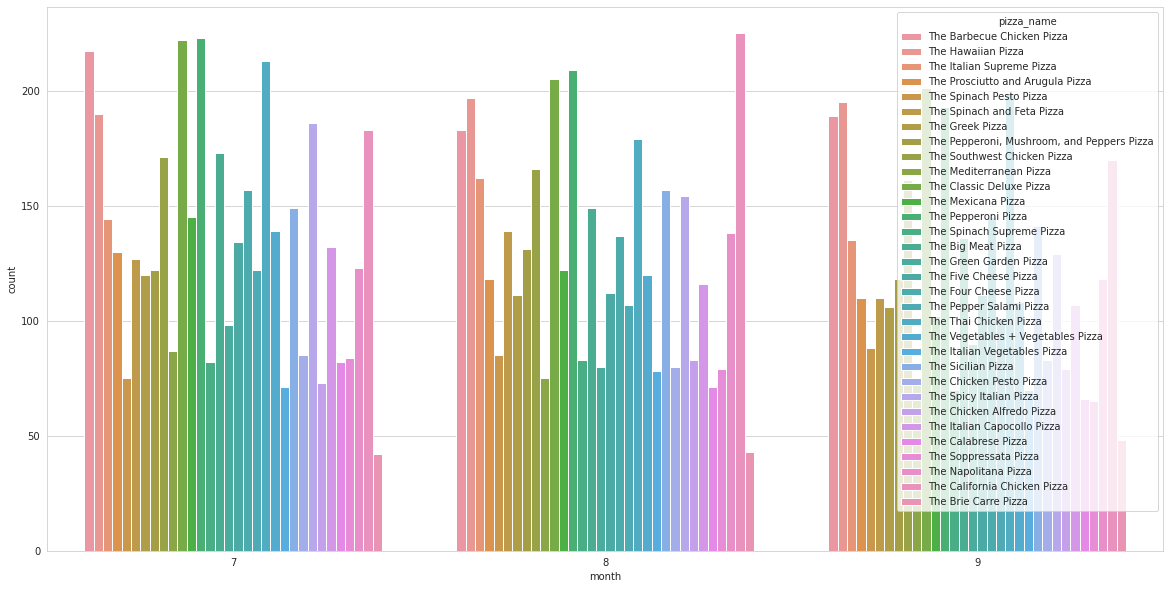

In [15]:
#Ploting Monthly Ordered Pizzas in Phases of three months where 7=July,8=August,9=September
df_month_3=df[df['month'].isin([7,8,9])]
plt.figure(figsize=(20,10))
sns.countplot(x='month',hue='pizza_name',data=df_month_3)
plt.show()

From the Above plot we can deduce the following

1.   Month 7 which denotes July,The least Ordered Pizza is the Brie Carre Pizza
2.   Month 8 which denotes August,The least Ordered Pizza is the Brie Carre Pizza
3.   Month 9 which denotes September ,The  least Ordered Pizza is the Brie Carre Pizza

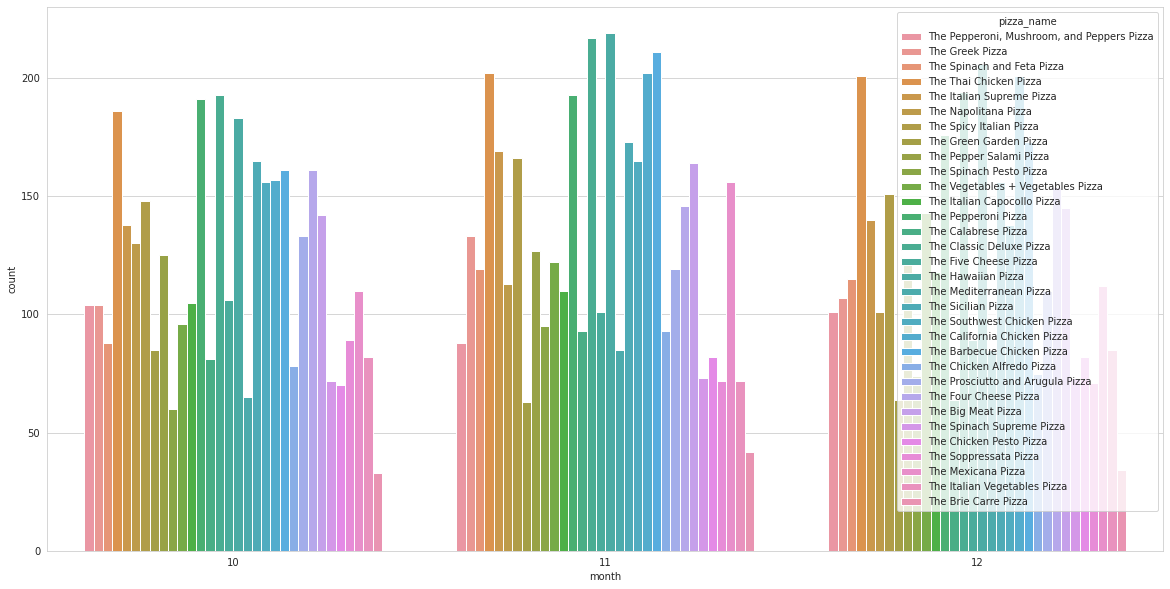

In [16]:
#Ploting Monthly Ordered Pizzas in Phases of three months where 10=October,11=November,12=December
df_month_4=df[df['month'].isin([10,11,12])]
plt.figure(figsize=(20,10))
sns.countplot(x='month',hue='pizza_name',data=df_month_4)
plt.show()

From the Above plot we can deduce the following

1.   Month 10 which denotes October,The least Ordered Pizza is the Brie Carre Pizza
2.   Month 11 which denotes November,The least Ordered Pizza is the Brie Carre Pizza
3.   Month 12 which denotes December ,The  least Ordered Pizza is the Brie Carre Pizza

What Pizza Category and Pizza name are less ordered

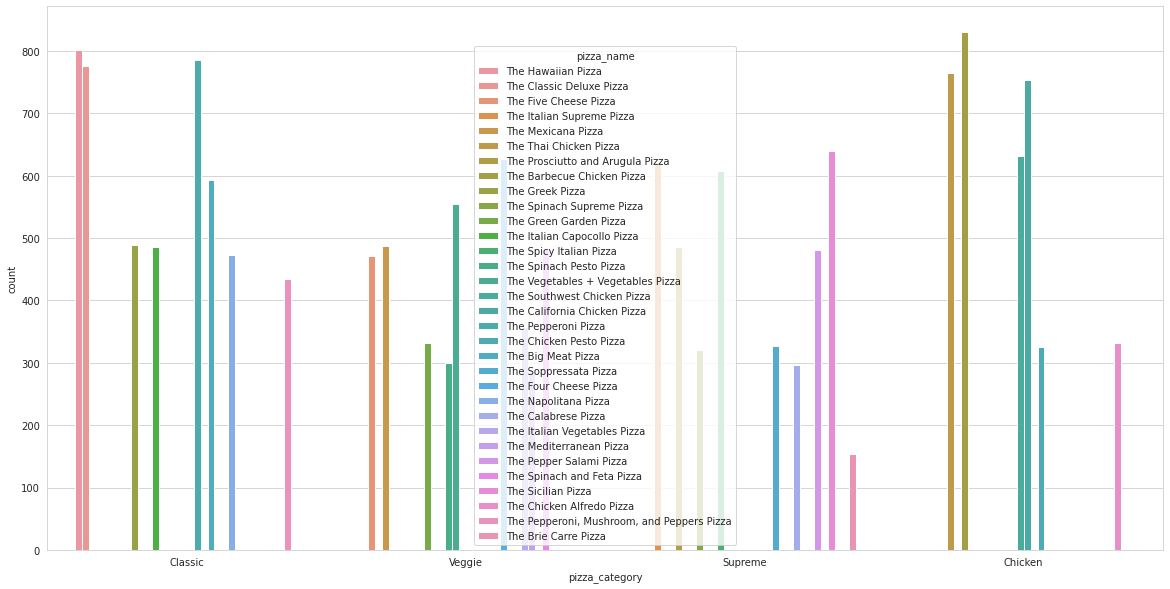

In [17]:
#Using the group by function to group  by month to Plot Quartely Ordered Pizza Category and Pizza name which are January,Febuary,March,April
df_month_5=df[df['month'].isin([1,2,3,4])]
df_month_5.groupby(['pizza_category','pizza_name'])['quantity'].count()
plt.figure(figsize=(20,10))
sns.countplot(hue='pizza_name',x='pizza_category',data=df_month_5)
plt.show()

From the above Visualization we can deduce that the Quartely ordered  Pizza category and pizza name  is the Brie Carre Pizza under the Pizza Category Supreme

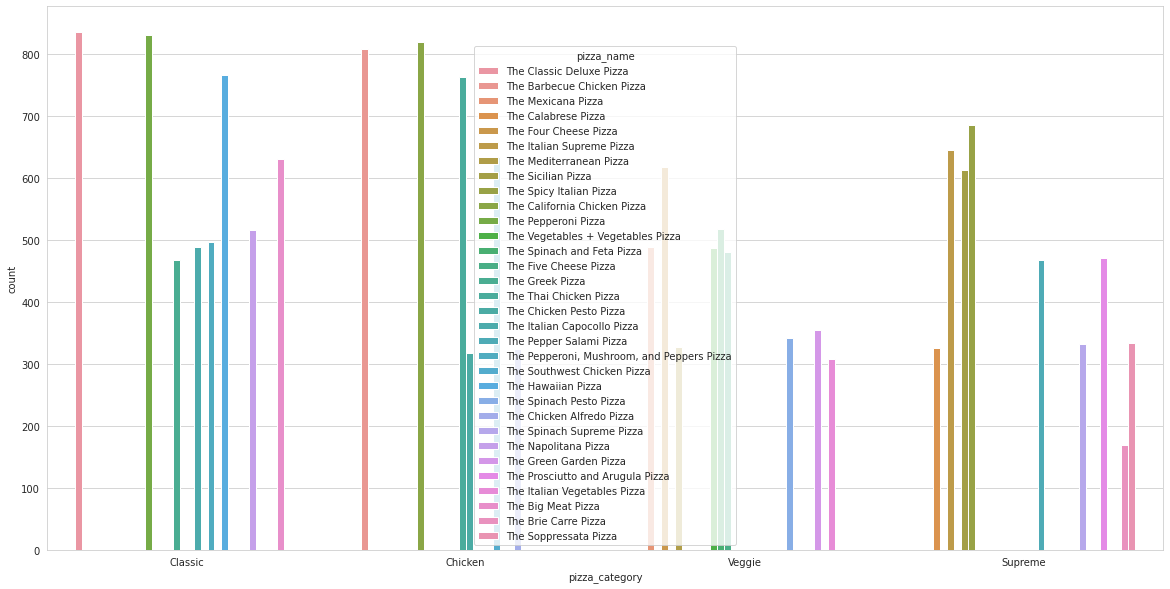

In [18]:
#Using the group by function to group  by month to Plot Quartely Ordered Pizza Category and Pizza name which are May,June,July,August
df_month_6=df[df['month'].isin([5,6,7,8])]
df_month_6.groupby(['pizza_category','pizza_name'])['quantity'].count()
plt.figure(figsize=(20,10))
sns.countplot(hue='pizza_name',x='pizza_category',data=df_month_6)
plt.show()

From the above Visualization we can deduce that the Quartely ordered  Pizza category and pizza name  is the Brie Carre Pizza under pizza category Supreme

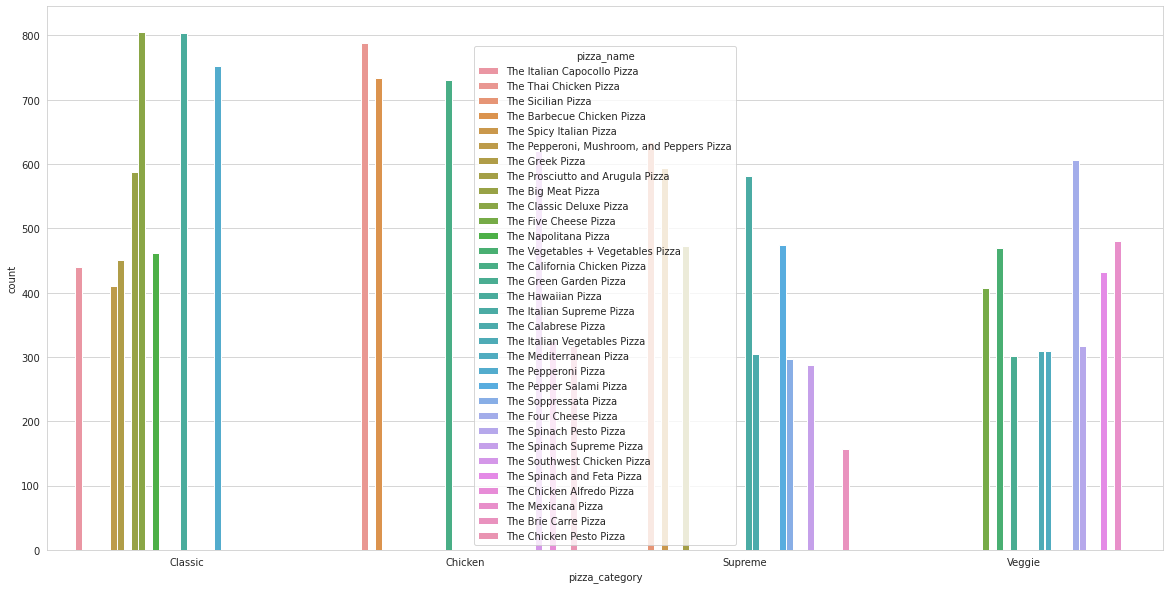

In [19]:
#Using the group by function to group  by month to Plot Quartely Ordered Pizza Category and Pizza name which are September,October,November,December
df_month_7=df[df['month'].isin([9,10,11,12])]
df_month_7.groupby(['pizza_category','pizza_name'])['quantity'].count()
plt.figure(figsize=(20,10))
sns.countplot(hue='pizza_name',x='pizza_category',data=df_month_7)
plt.show()

From the above Visualization we can deduce that the Quartely ordered  Pizza category and pizza name  is the Brie Carre Pizza under pizza category Supreme

What Pizza Category,Pizza Size are ordered  Less

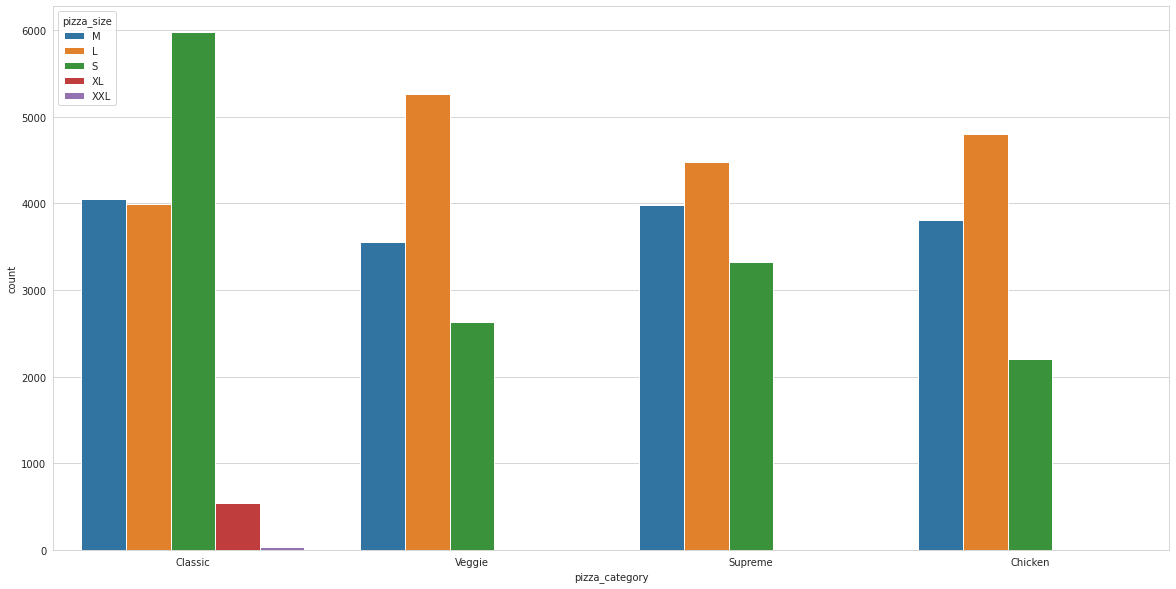

In [21]:
#Using the Seaborn Countplot library to analyse which Pizza Category,Pizza size are ordered less
plt.figure(figsize=(20,10))
sns.countplot(hue='pizza_size',x='pizza_category',data=df)
plt.show()

From the above Visualization we can deduce that The Classic Pizza Category with Pizza Size  XXL is lessly ordered

What Pizza is Sold Less

In [23]:
df_sales=df.groupby('pizza_name')['total_price'].sum()
df_sales

pizza_name
The Barbecue Chicken Pizza                    42768.00
The Big Meat Pizza                            22968.00
The Brie Carre Pizza                          11588.50
The Calabrese Pizza                           15934.25
The California Chicken Pizza                  41409.50
The Chicken Alfredo Pizza                     16900.25
The Chicken Pesto Pizza                       16701.75
The Classic Deluxe Pizza                      38180.50
The Five Cheese Pizza                         26066.50
The Four Cheese Pizza                         32265.70
The Greek Pizza                               28454.10
The Green Garden Pizza                        13955.75
The Hawaiian Pizza                            32273.25
The Italian Capocollo Pizza                   25094.00
The Italian Supreme Pizza                     33476.75
The Italian Vegetables Pizza                  16019.25
The Mediterranean Pizza                       15360.50
The Mexicana Pizza                            26780.75

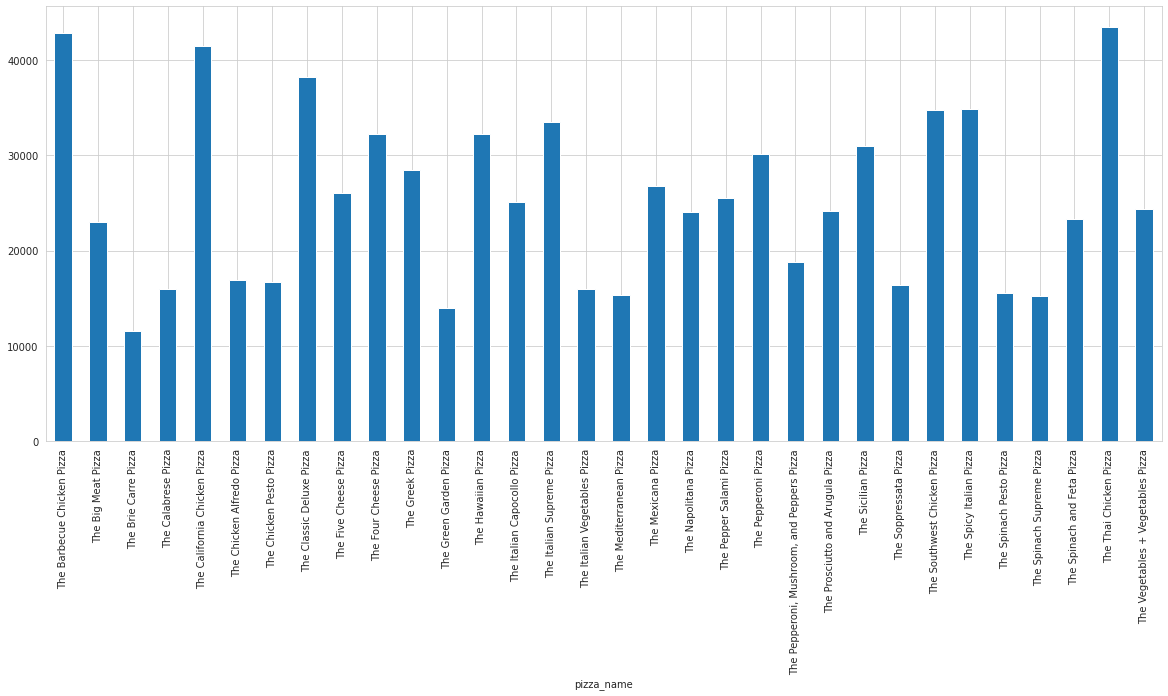

In [25]:
#Using the Barplot Fuction to visualize the sales of pizza
plt.figure(figsize=(20,8))
df_sales.plot.bar(x='pizza_name',stacked=True)
plt.show()

From the above Visualization,we can deduce that the The Brie Carre Pizza has the lowest Sales

**DATA PREPROCESSING**






Data Cleaning & Transformation

In [28]:
#Checking for the First few rows in the dataset
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,year,day
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,2015,1
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,2015,1
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,2015,1
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,2015,1
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,2015,1


Checking for Missing Values in the dataset

In [31]:
#Checking for Missing values in the dataset
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
month                0
year                 0
day                  0
dtype: int64

In [33]:
#Checking for information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
 12  month              48620 non-null  int64  
 13  year               48620 non-null  int64  
 14  day                48620 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 5.6+ MB


In [38]:
#Checking for the columns names in the dataset
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'month', 'year',
       'day'],
      dtype='object')

In [41]:
#Checking for the size of the the dataset
df.shape

(48620, 15)

We can deduce that this dataset has 15 columns and 48620 rows

Creating a new dataframe 

In [9]:
#Creating a new dataframe
df_new=df[['unit_price','total_price','quantity','pizza_category']]
df_new

,unit_price,total_price,quantity,pizza_category
0,13.25,13.25,1,Classic
1,16.00,16.00,1,Classic
2,18.50,18.50,1,Veggie
3,20.75,20.75,1,Supreme
4,16.00,16.00,1,Veggie
...,...,...,...,...
48615,16.75,16.75,1,Chicken
48616,17.95,17.95,1,Veggie
48617,12.00,12.00,1,Classic
48618,20.25,20.25,1,Veggie


**STATISTICS/COMPUTATION BASED DATA ANALYSIS**

Due to the Pizza Dataset and what we wont to analyse which is the Pizza Category , We would be using a Machine learning technique which is the Classification Technique.This is because Classification helps in predicting discrete values while regression helps in predicting continuous values.

We will be using the KNN and Decision Tree Classification Technique for this purpose

Using the new dataframe df_new for this purpose

In [10]:
#This are the variables we will be using for this Approach which are the unit_price,total_price,quantity,pizza_category
df_new

,unit_price,total_price,quantity,pizza_category
0,13.25,13.25,1,Classic
1,16.00,16.00,1,Classic
2,18.50,18.50,1,Veggie
3,20.75,20.75,1,Supreme
4,16.00,16.00,1,Veggie
...,...,...,...,...
48615,16.75,16.75,1,Chicken
48616,17.95,17.95,1,Veggie
48617,12.00,12.00,1,Classic
48618,20.25,20.25,1,Veggie


Scatter Plot 

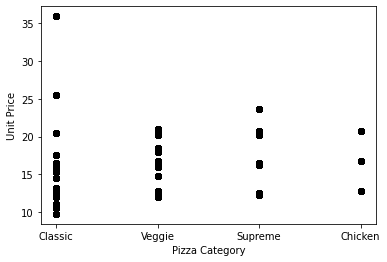

In [11]:
#This is also used to justify that it is a classification technique.Using the Unit price has Input and the Pizza category has output
plt.scatter(df_new.pizza_category,df_new.unit_price, color='black')
plt.xlabel("Pizza Category")
plt.ylabel("Unit Price")
plt.show()

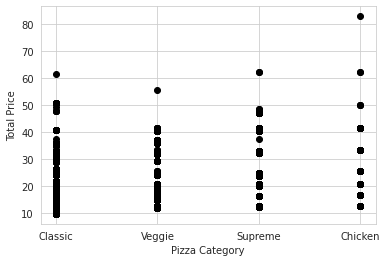

In [52]:
#This is also used to justify that it is a classification technique.Using the Total price has Input and the Pizza category has output
plt.scatter(df_new.pizza_category,df_new.total_price, color='black')
plt.xlabel("Pizza Category")
plt.ylabel("Total Price")
plt.show()

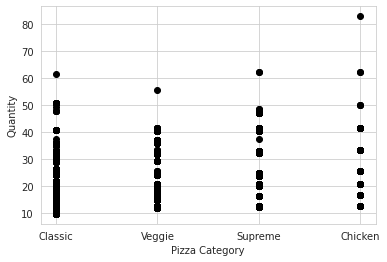

In [53]:
#This is also used to justify that it is a classification technique.Using the Total price has Input and the Pizza category has output
plt.scatter(df_new.pizza_category,df_new.total_price, color='black')
plt.xlabel("Pizza Category")
plt.ylabel("Quantity")
plt.show()

Defining the X and y Varaibles

In [12]:
#Defining the X variables which are the Unit Price,Total Price and Quantiy and printing he first few rows of the dataset
X=df_new[['total_price','quantity','unit_price']]
X[0:5]

,total_price,quantity,unit_price
0,13.25,1,13.25
1,16.00,1,16.00
2,18.50,1,18.50
3,20.75,1,20.75
4,16.00,1,16.00


In [13]:
#Defining the y variable which is the pizza category and printing the first few rows of the dataset
y=df_new['pizza_category']
y[0:5]

0    Classic
1    Classic
2     Veggie
3    Supreme
4     Veggie
Name: pizza_category, dtype: object

In [14]:
#Checking for information of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_price  48620 non-null  float64
 1   quantity     48620 non-null  int64  
 2   unit_price   48620 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


**Standardization of data**

In [15]:
ZScore_X=stats.zscore(X)
ZScore_X

,total_price,quantity,unit_price
0,-0.804866,-0.137141,-0.895736
1,-0.185127,-0.137141,-0.136435
2,0.378272,-0.137141,0.553839
3,0.885331,-0.137141,1.175085
4,-0.185127,-0.137141,-0.136435
...,...,...,...
48615,-0.016107,-0.137141,0.070648
48616,0.254324,-0.137141,0.401979
48617,-1.086566,-0.137141,-1.240872
48618,0.772651,-0.137141,1.037031


**Modelling**

Separating X and y into Train and Test

In [16]:
#Using the sklearn.model_selection to separate X and y into Test and Train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print('X_train = ',X_train.shape)
print('X_test = ',X_test.shape)
print('y_train = ',y_train.shape)
print('y_test = ',y_test.shape)

X_train =  (34034, 3)
X_test =  (14586, 3)
y_train =  (34034,)
y_test =  (14586,)


Training of the Model

In [17]:
#Importing the KneighborsClassifier Library
from sklearn.neighbors import KNeighborsClassifier

In [18]:
#Fitting the X_train and y_train
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

Predicting the Pizza Category

In [19]:
#Passing the X_test and Predicting the Neighbor  
y_pred=neigh.predict(X_test)
y_pred

array(['Supreme', 'Chicken', 'Supreme', ..., 'Veggie', 'Supreme',
       'Veggie'], dtype=object)

Accuracy of Model 

In [20]:
#Checking for the accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy is = ',accuracy_score(y_pred,y_test))

Accuracy is =  0.7244618126971069


In [21]:
#Varying the value of K to confirm model Accuracy
Ks = 10
mean_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_pred,y_test)

    

mean_acc

array([0.74818319, 0.68161251, 0.75023996, 0.72446181, 0.69847799,
       0.72446181, 0.72638146, 0.75147402, 0.72679282, 0.72658714])

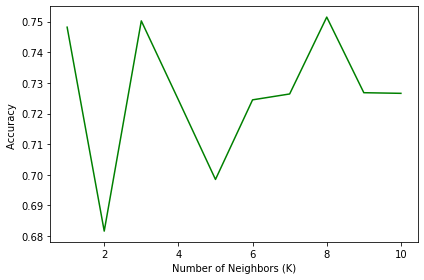

In [22]:
#Ploting an accuracy graph
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Form the Graph above,we can deduce that when K=8,Accuracy score is 0.75 which gives the best accuracy value

**Using Decison Tree Classification Model**

Creating the DecisionTreeClassifier has DecTree

In [23]:
#Creating Decision Tree Classifier has DecTree
from sklearn.tree import DecisionTreeClassifier
DecTree=DecisionTreeClassifier(criterion='entropy',max_depth=4)


In [24]:
#Fitting the data with training feature X_train & y_train
DecTree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
#Prediction
predTree=DecTree.predict(X_test)
predTree

array(['Supreme', 'Chicken', 'Supreme', ..., 'Veggie', 'Supreme',
       'Veggie'], dtype=object)

In [26]:
print('Decision Accuracy is = ',accuracy_score(predTree,y_test))

Decision Accuracy is =  0.6056492527080762
